In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
train_dir = r"C:\Users\M S I\Documents\BANGKIT\train"
test_dir = r"C:\Users\M S I\Documents\BANGKIT\test"

In [3]:
# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [8]:
# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

# Load and preprocess testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

# Get the number of classes
num_classes = train_generator.num_classes

Found 15557 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.


In [9]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


C:\Users\M S I\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/25


C:\Users\M S I\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


486/486 ━━━━━━━━━━━━━━━━━━━━ 392s 777ms/step - accuracy: 0.1125 - loss: 3.0085 - val_accuracy: 0.1460 - val_loss: 2.8316
Epoch 2/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - accuracy: 0.0938 - loss: 3.0322 - val_accuracy: 0.0000e+00 - val_loss: 3.0485
Epoch 3/25


C:\Users\M S I\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


486/486 ━━━━━━━━━━━━━━━━━━━━ 315s 641ms/step - accuracy: 0.1561 - loss: 2.8399 - val_accuracy: 0.1758 - val_loss: 2.7707
Epoch 4/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.1875 - loss: 2.7347 - val_accuracy: 0.0000e+00 - val_loss: 2.6668
Epoch 5/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 311s 635ms/step - accuracy: 0.1642 - loss: 2.8056 - val_accuracy: 0.1943 - val_loss: 2.7276
Epoch 6/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.1562 - loss: 2.8869 - val_accuracy: 0.5000 - val_loss: 2.7584
Epoch 7/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 309s 631ms/step - accuracy: 0.1938 - loss: 2.7296 - val_accuracy: 0.2065 - val_loss: 2.6730
Epoch 8/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 0s 59us/step - accuracy: 0.3125 - loss: 2.6976 - val_accuracy: 0.0000e+00 - val_loss: 2.4087
Epoch 9/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 306s 625ms/step - accuracy: 0.1986 - loss: 2.7044 - val_accuracy: 0.2070 - val_loss: 2.6710
Epoch 10/25
486/486 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.2812 - loss: 2.6780 

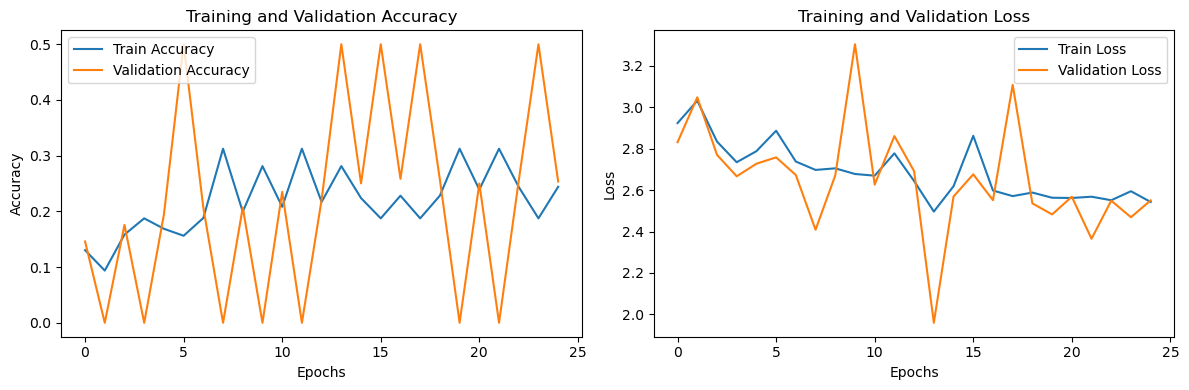

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Save the model
model.save('cnn_skin_disease_classifier.h5')



In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {accuracy:.4f}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 257ms/step - accuracy: 0.2395 - loss: 2.5862
Test accuracy: 0.2535
